# Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/global-suicide-rates/30_merged_dataset_v00_final.csv')

***In 2015, approximately 55 million people died worldwide, of which 8 million committed suicide. In the USA, one of the main causes of death is the aforementioned suicide, therefore, this experiment is dealing with the question of how much suicide rates affects the statistics of average life expectancy.***

# Exploring the Data

In [3]:
df.shape

(1421, 13)

In [4]:
df.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [5]:
df.tail()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
1416,Venezuela (Bolivarian Republic of),2009,751.0,73.6,166.0,9,7.59,10,0.1,25.448414,25646139.0,0.754,14.0
1417,Venezuela (Bolivarian Republic of),2010,775.0,73.7,158.0,9,7.22,10,0.1,25.448414,26078766.0,0.754,14.0
1418,Venezuela (Bolivarian Republic of),2011,760.0,73.8,158.0,9,6.74,10,0.1,25.448414,26503892.0,0.756,14.1
1419,Venezuela (Bolivarian Republic of),2012,731.0,73.7,161.0,9,6.70,10,0.1,25.448414,26926228.0,0.767,14.1
1420,Venezuela (Bolivarian Republic of),2013,618.0,73.8,159.0,9,6.71,10,0.1,25.448414,27345912.0,0.770,14.2


In [6]:
df.columns.to_list()

['Country',
 'Year',
 'Suicides number',
 'Life expectancy',
 'Adult Mortality',
 'Infant deaths',
 'Alcohol',
 'Under-five deaths',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Income composition of resources',
 'Schooling']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1421 non-null   object 
 1   Year                             1421 non-null   int64  
 2   Suicides number                  1421 non-null   float64
 3   Life expectancy                  1421 non-null   float64
 4   Adult Mortality                  1421 non-null   float64
 5   Infant deaths                    1421 non-null   int64  
 6   Alcohol                          1421 non-null   float64
 7   Under-five deaths                1421 non-null   int64  
 8   HIV/AIDS                         1421 non-null   float64
 9   GDP                              1421 non-null   float64
 10  Population                       1421 non-null   float64
 11  Income composition of resources  1421 non-null   float64
 12  Schooling           

In [8]:
df.isna().sum()

Country                            0
Year                               0
Suicides number                    0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Under-five deaths                  0
HIV/AIDS                           0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,2007.251935,2629.177340,75.233638,116.912738,5.805067,6.664729,7.038705,0.397537,14018.867107,1.294056e+07,0.748189,13.929838
std,4.503817,6755.607644,5.399686,74.413799,13.088297,3.917763,16.104082,2.227681,19697.409425,3.652156e+07,0.160380,2.462661
min,2000.000000,0.000000,53.700000,1.000000,0.000000,0.010000,0.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,2003.000000,85.000000,72.500000,68.000000,0.000000,3.540000,0.000000,0.100000,1564.966945,2.541220e+05,0.695000,12.500000
50%,2007.000000,501.000000,74.900000,117.000000,1.000000,6.950000,1.000000,0.100000,4622.415160,1.735275e+06,0.773000,13.800000
75%,2011.000000,1867.000000,78.900000,163.000000,4.000000,9.800000,5.000000,0.100000,16462.485560,7.463157e+06,0.852000,15.600000
max,2015.000000,56958.000000,89.000000,498.000000,111.000000,17.870000,127.000000,29.700000,119172.741800,3.000785e+08,0.948000,20.700000


# Cleaning the Data

In [11]:
df.columns

Index(['Country', 'Year', 'Suicides number', 'Life expectancy',
       'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths',
       'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [12]:
df.rename(columns={
       'Life expectancy':'Average age',
       'Adult Mortality':'Adult Death',
       'GDP':'Gross Domestic Product', 
},inplace = True)

In [13]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


# Analysis and Visualization

In [14]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


<h2>Country<h2>

In [15]:
Country = df['Country'].value_counts().reset_index().sort_values(by='count',ascending = False)
Country

,Country,count
0,Nicaragua,16
39,Brazil,16
28,Argentina,16
30,Netherlands,16
31,Austria,16
...,...,...
101,Tunisia,2
102,Kiribati,2
103,Bosnia and Herzegovina,2
104,Iraq,1


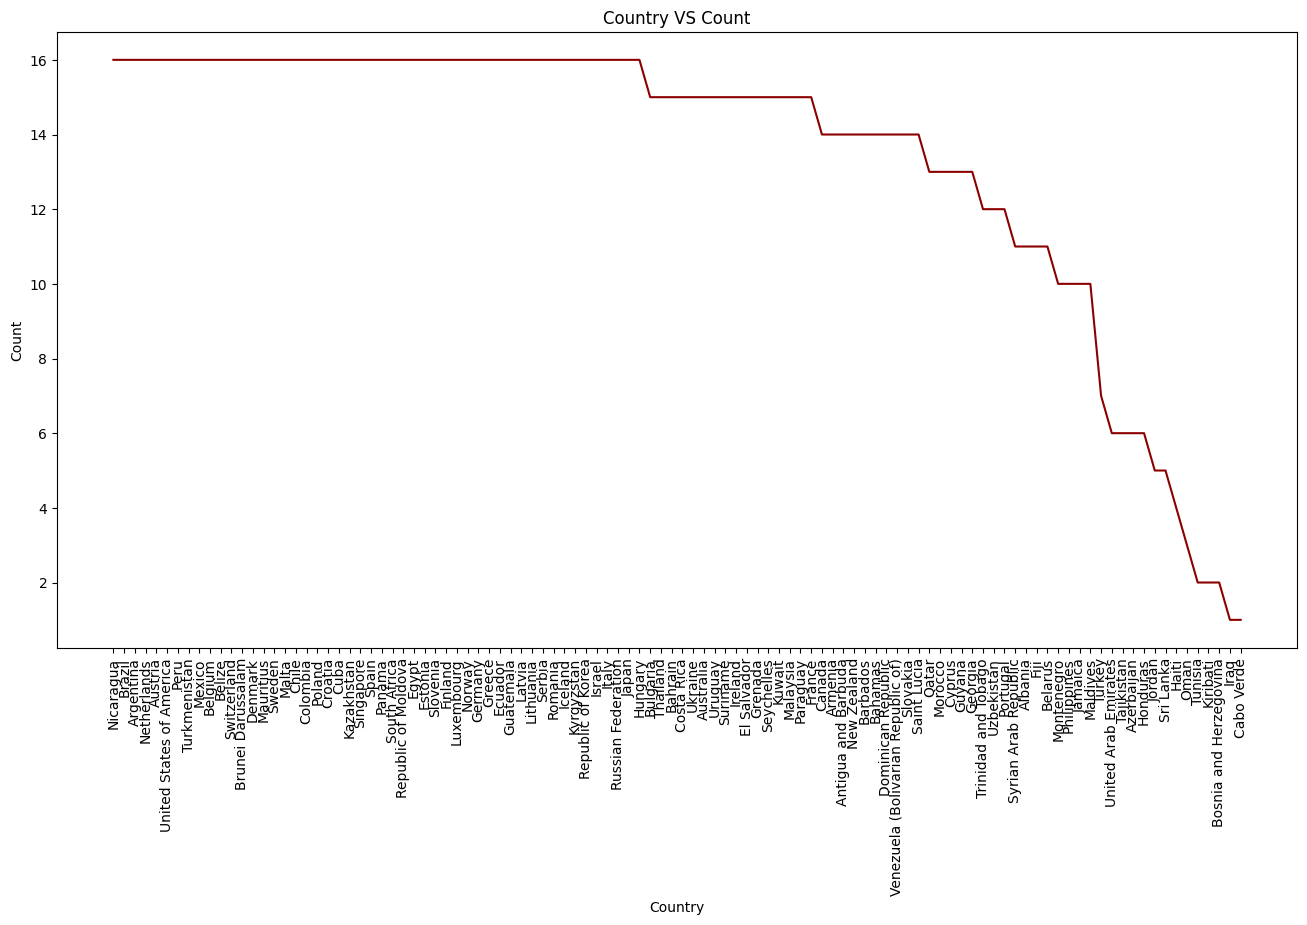

In [16]:
plt.figure(figsize=(16,8))
plt.plot(Country['Country'],Country['count'],color='darkred')
plt.title('Country VS Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This Graph show the contry that repeated about more one year and how many the death happen in this country**

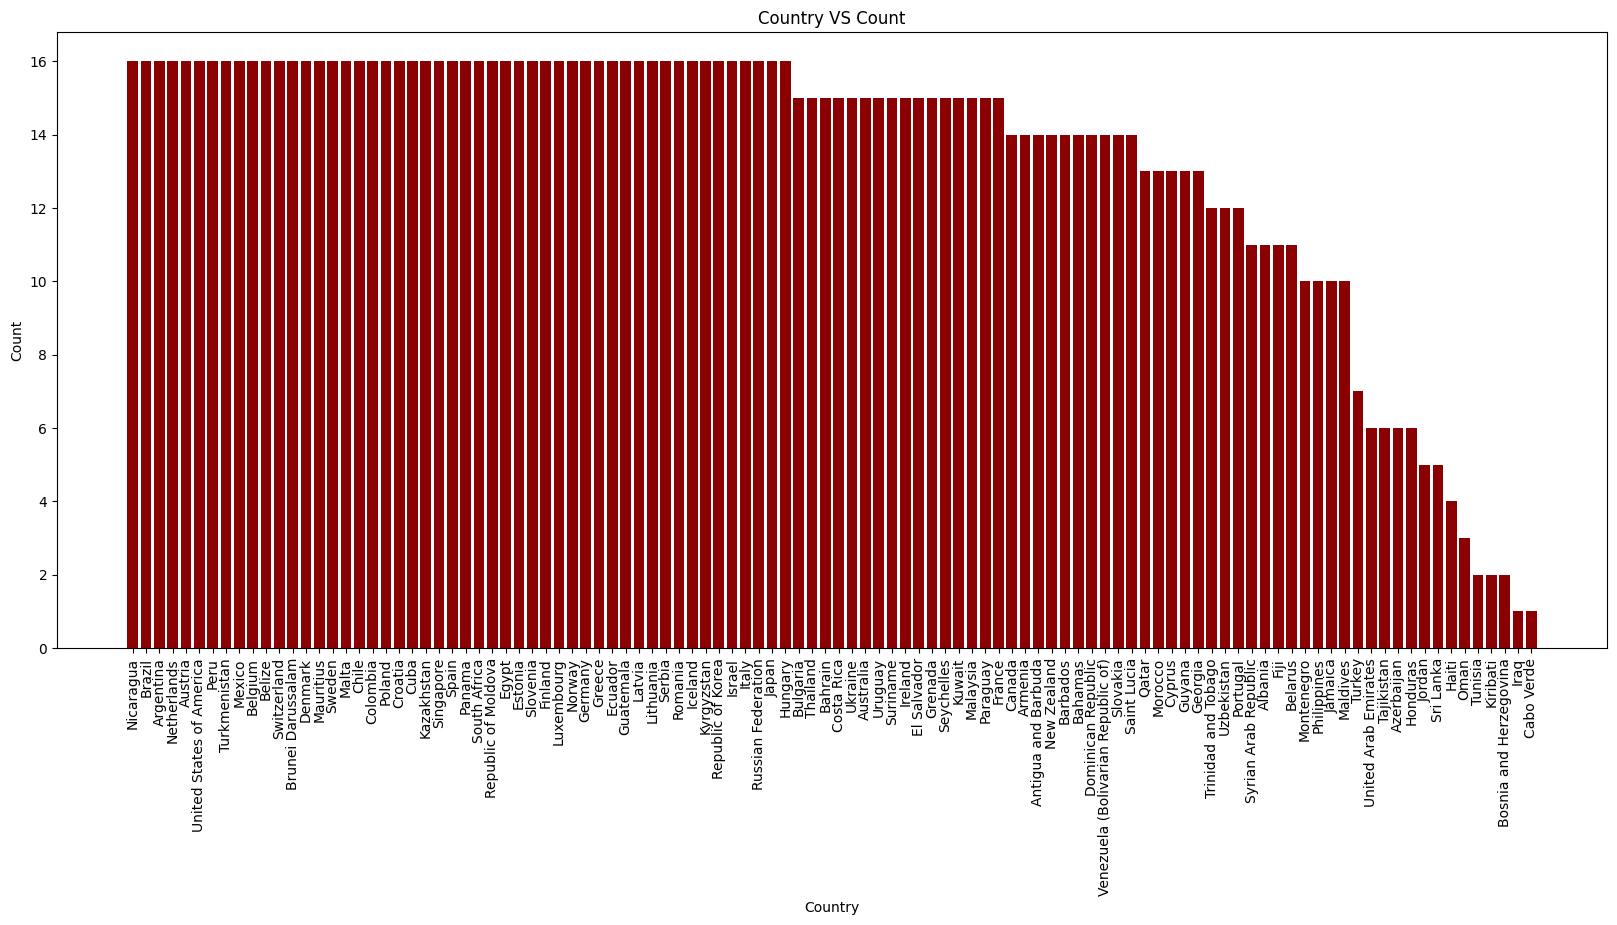

In [17]:
plt.figure(figsize=(20,8))
plt.bar(Country['Country'],Country['count'],color='darkred')
plt.title('Country VS Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**The same thing but as Bar**

<h2>Country with Year<h2>

In [18]:
CountrywithYear = df['Year'].value_counts().reset_index().sort_values(by='count',ascending = False)
CountrywithYear

,Year,count
0,2009,97
1,2001,95
2,2010,94
3,2002,93
4,2003,93
5,2008,93
6,2000,91
7,2004,91
8,2007,91
9,2011,91


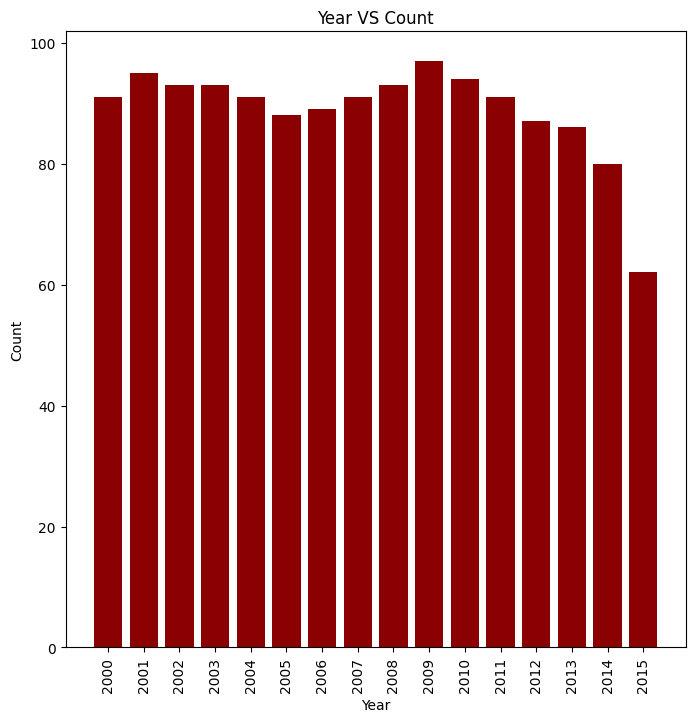

In [19]:
plt.figure(figsize=(8,8))
plt.bar(CountrywithYear['Year'],CountrywithYear['count'],color='darkred')
plt.title('Year VS Count')
plt.xlabel('Year')
plt.ylabel('Count') # count here mean the number of country in the year number of death have
plt.xticks(CountrywithYear['Year'],rotation=90)
plt.show()

**The number of country that have death for every year**

<h2>Country with Suicides number<h2> 

In [20]:
CountrywithSuicidesnumber = df.groupby('Country')['Suicides number'].sum().reset_index()
CountrywithSuicidesnumber

,Country,Suicides number
0,Albania,956.0
1,Antigua and Barbuda,9.0
2,Argentina,48927.0
3,Armenia,937.0
4,Australia,36380.0
...,...,...
101,United Arab Emirates,622.0
102,United States of America,575514.0
103,Uruguay,8333.0
104,Uzbekistan,19680.0


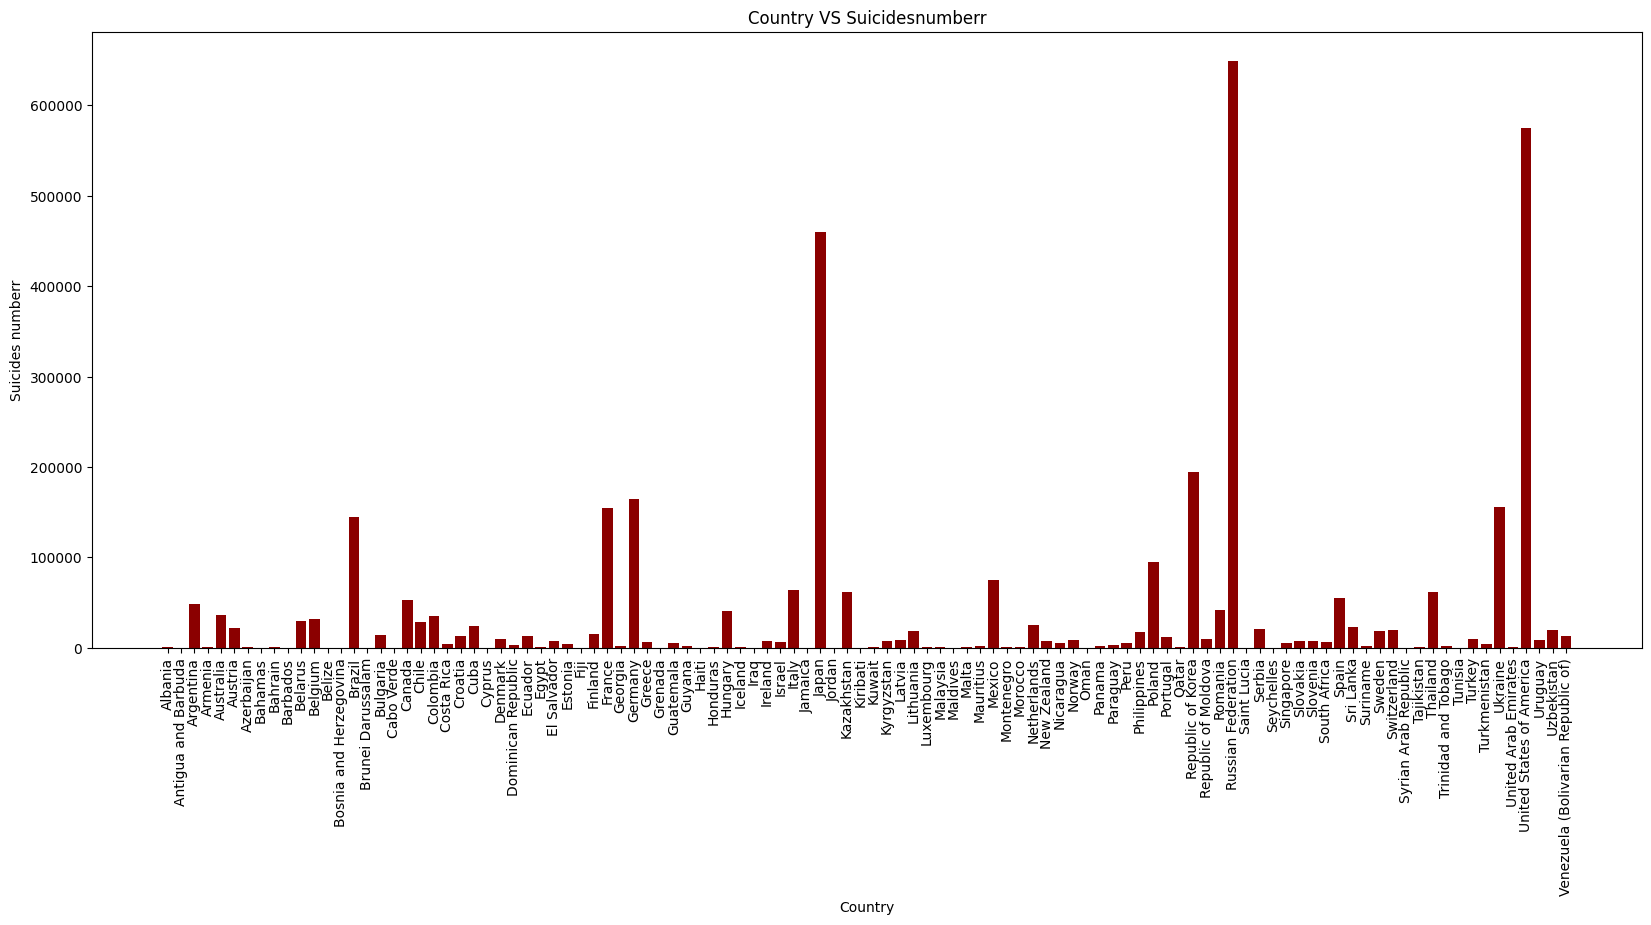

In [21]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithSuicidesnumber['Country'],CountrywithSuicidesnumber['Suicides number'],color='darkred')
plt.title('Country VS Suicidesnumberr')
plt.xlabel('Country')
plt.ylabel('Suicides numberr') 
plt.xticks(CountrywithSuicidesnumber['Country'],rotation=90)
plt.show()

**From this graph we can see the most of Suicides is in USA and Jaban and Russia**

<h2>All Country have Suicides number<h2>

In [22]:
all_country = df.groupby('Country')['Suicides number'].sum().reset_index().sort_values(by='Suicides number',ascending = False)
all_country

,Country,Suicides number
80,Russian Federation,649026.0
102,United States of America,575514.0
49,Japan,460105.0
77,Republic of Korea,194847.0
35,Germany,164279.0
...,...,...
59,Maldives,20.0
37,Grenada,18.0
1,Antigua and Barbuda,9.0
44,Iraq,3.0


<h2>Top 10 Country have Suicides number<h2>

In [23]:
top10CountrywithSuicidesnumber = df.groupby('Country')['Suicides number'].sum().reset_index().sort_values(by='Suicides number',ascending = False).head(10)
top10CountrywithSuicidesnumber

,Country,Suicides number
80,Russian Federation,649026.0
102,United States of America,575514.0
49,Japan,460105.0
77,Republic of Korea,194847.0
35,Germany,164279.0
100,Ukraine,156200.0
33,France,154742.0
14,Brazil,144389.0
74,Poland,95232.0
62,Mexico,75542.0


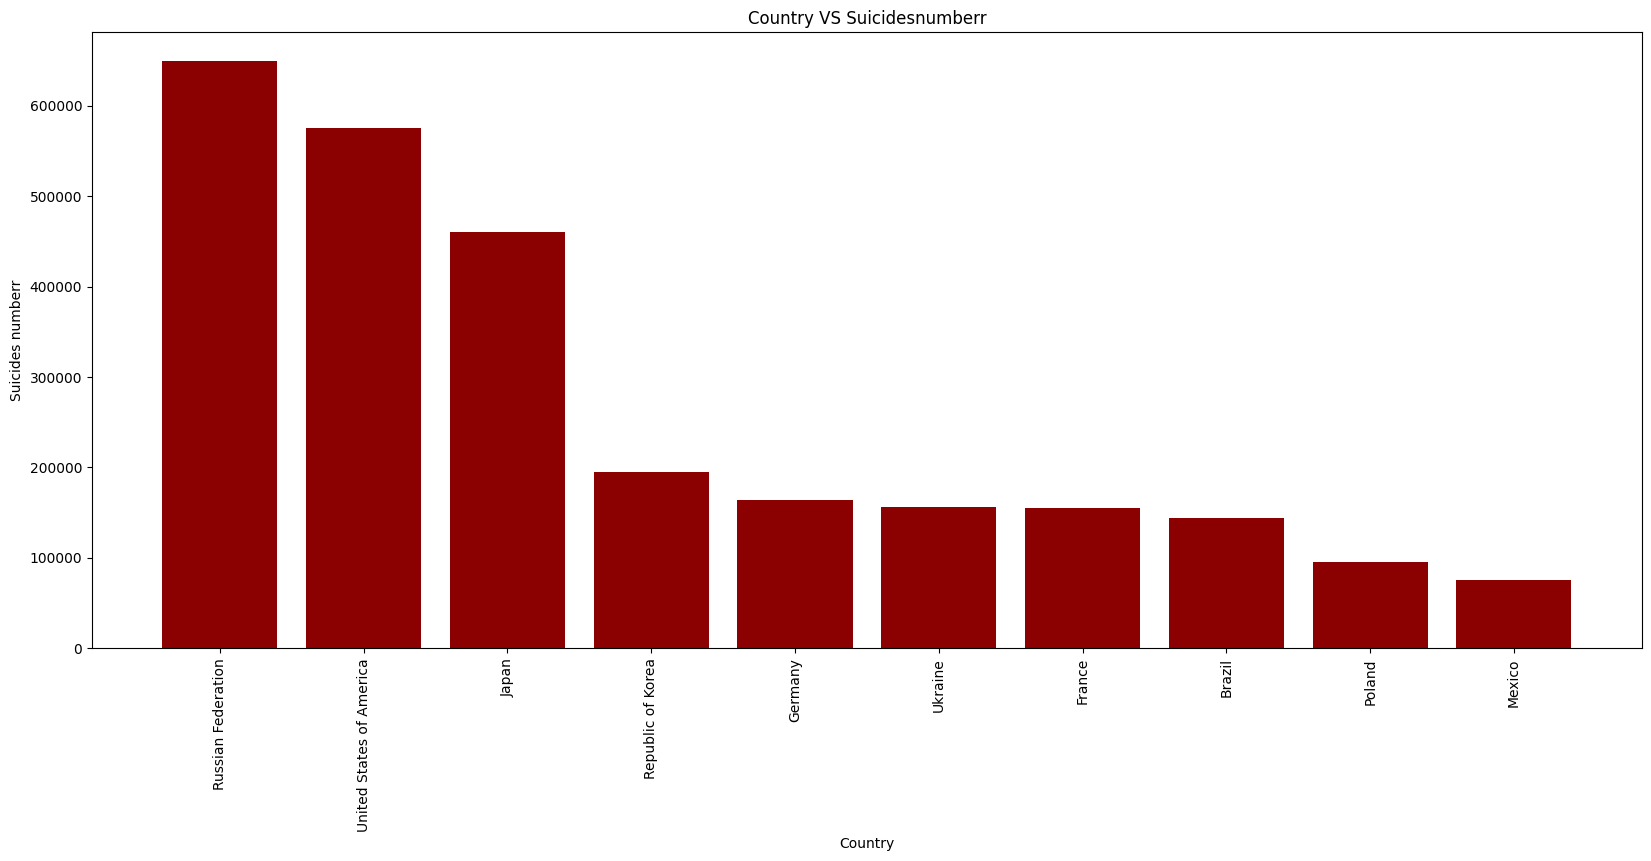

In [24]:
plt.figure(figsize=(20,8))
plt.bar(top10CountrywithSuicidesnumber['Country'],top10CountrywithSuicidesnumber['Suicides number'],color='darkred')
plt.title('Country VS Suicidesnumberr')
plt.xlabel('Country')
plt.ylabel('Suicides numberr')
plt.xticks(top10CountrywithSuicidesnumber['Country'],rotation=90)
plt.show()

**This Graph show the Top 10 country of Suicides number**

<h2>Top 10 Country have Suicides With Other<h2>

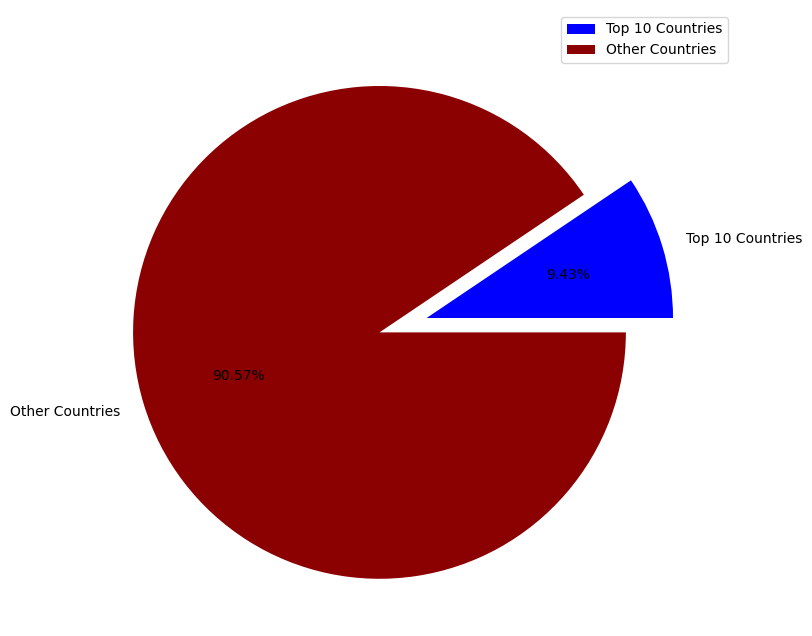

In [25]:
plt.figure(figsize=(8,8))
plt.pie(
    [len(top10CountrywithSuicidesnumber),len(all_country)-len(top10CountrywithSuicidesnumber)],
    labels=['Top 10 Countries', 'Other Countries'],
    autopct='%1.2f%%',
    colors=['b','darkred'],
    explode=[0,0.2]
)
plt.legend()
plt.show()

<h2>Country with Average age<h2>

In [26]:
CountrywithAverageage = df.groupby('Country')['Average age'].sum().reset_index()
CountrywithAverageage

,Country,Average age
0,Albania,816.5
1,Antigua and Barbuda,1049.6
2,Argentina,1202.5
3,Armenia,1028.4
4,Australia,1228.0
...,...,...
101,United Arab Emirates,454.3
102,United States of America,1249.0
103,Uruguay,1140.2
104,Uzbekistan,815.8


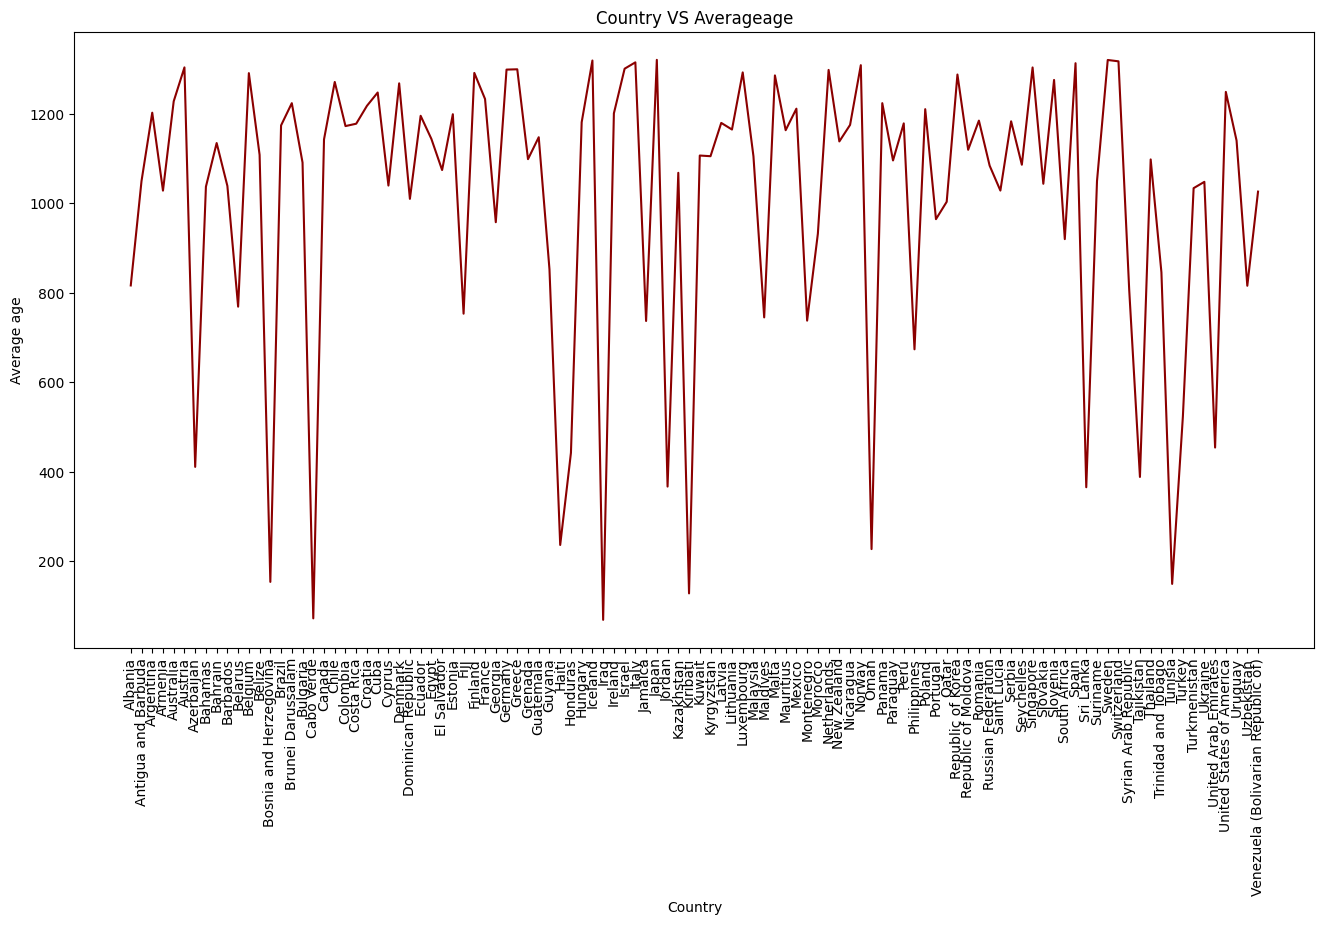

In [27]:
plt.figure(figsize=(16,8))
plt.plot(CountrywithAverageage['Country'],CountrywithAverageage['Average age'],color='darkred')
plt.title('Country VS Averageage')
plt.xlabel('Country')
plt.ylabel('Average age')
plt.xticks(rotation=90)
plt.show()

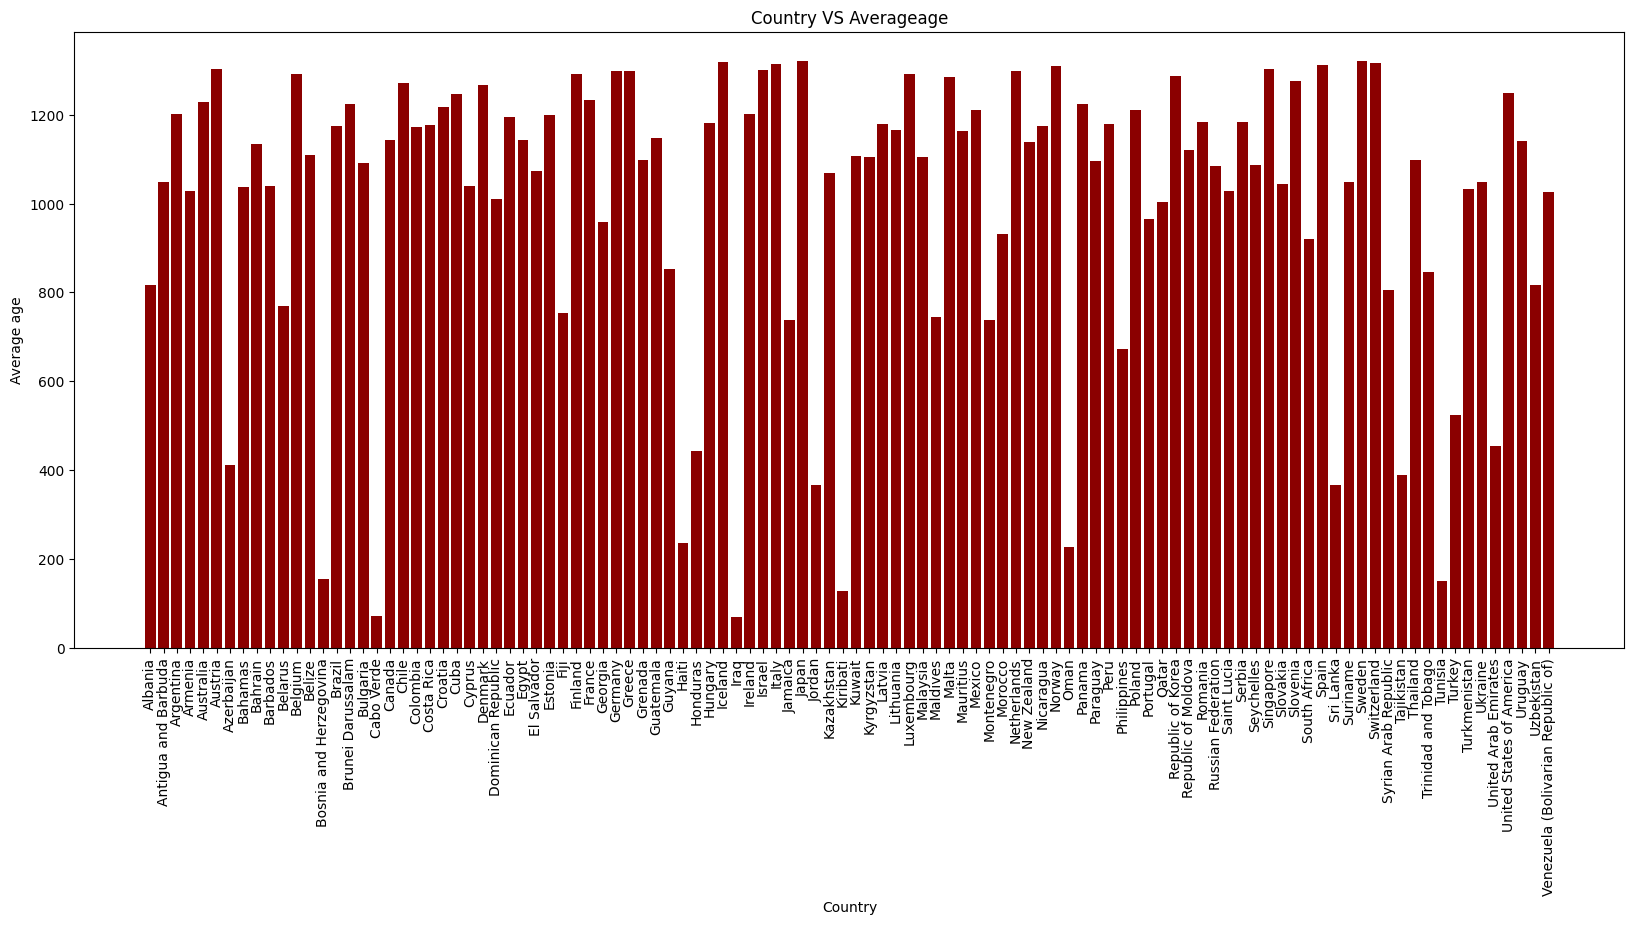

In [28]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithAverageage['Country'],CountrywithAverageage['Average age'],color='darkred')
plt.title('Country VS Averageage')
plt.xlabel('Country')
plt.ylabel('Average age')
plt.xticks(rotation=90)
plt.show()

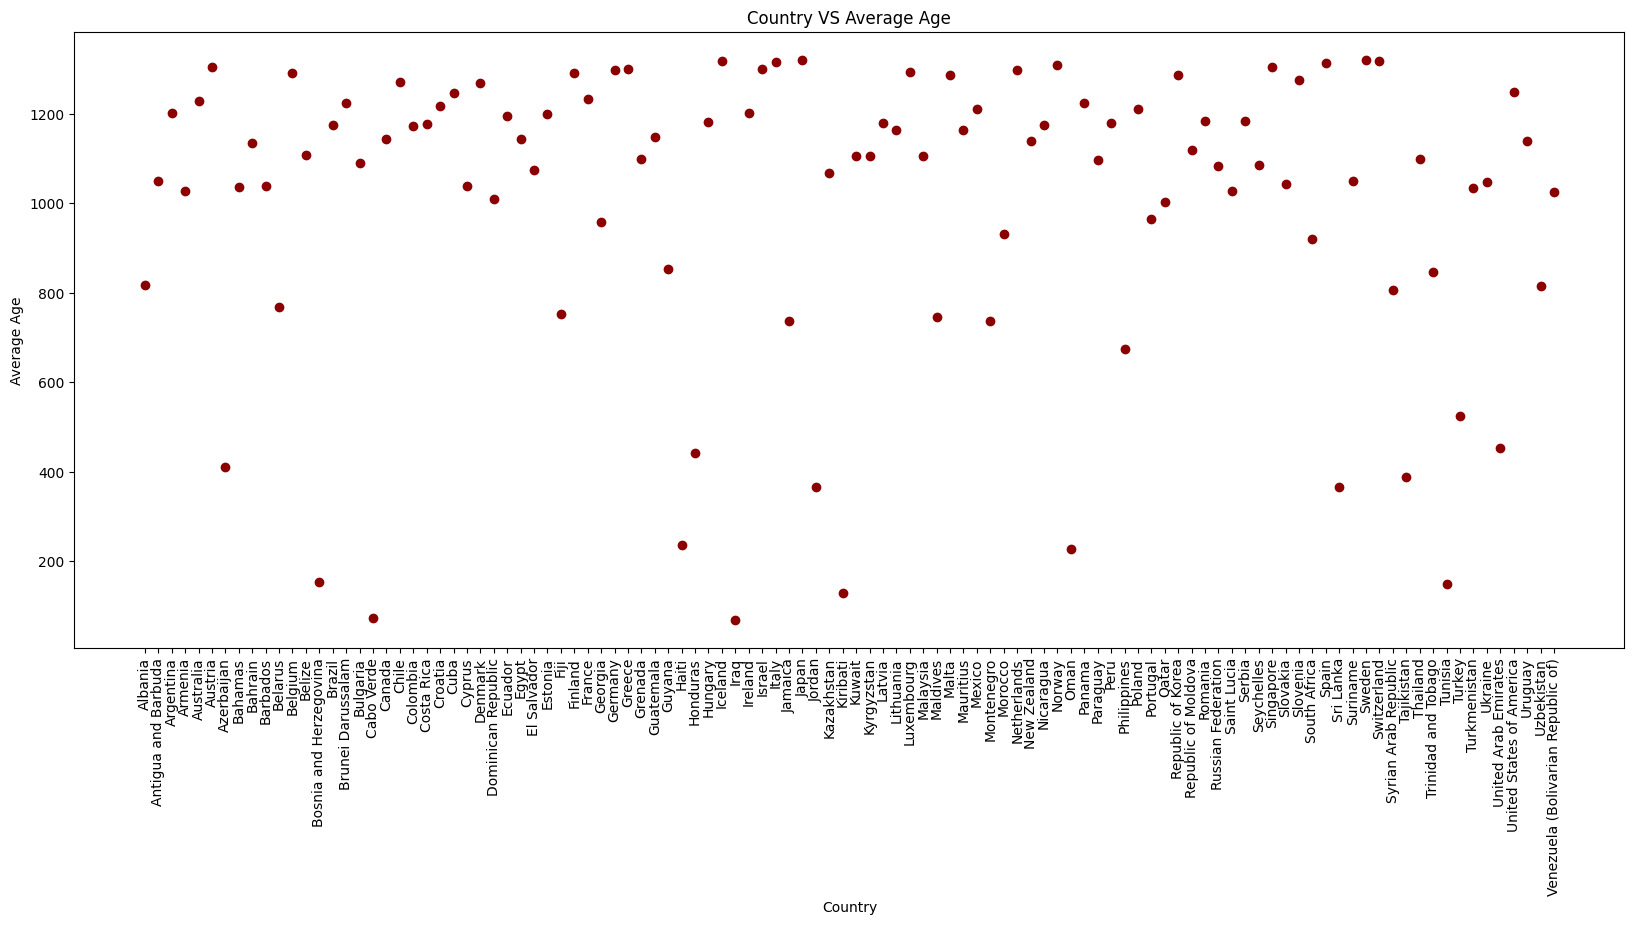

In [29]:
plt.figure(figsize=(20, 8)) 
plt.scatter(CountrywithAverageage['Country'], CountrywithAverageage['Average age'], color='darkred')
plt.title('Country VS Average Age')  
plt.xlabel('Country')  
plt.ylabel('Average Age') 
plt.xticks(rotation=90)  

plt.show() 

**From this last 3 graphs we show the average of age for all country and from the graphs we can see this country have alow avg ex cabo verde, iraq, and another country**

In [30]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


<h2>Country with Adult deaths<h2>

In [31]:
CountrywithAdultdeaths = df.groupby('Country')[['Adult Death']].sum().reset_index()
CountrywithAdultdeaths

,Country,Adult Death
0,Albania,381.0
1,Antigua and Barbuda,1766.0
2,Argentina,1696.0
3,Armenia,1609.0
4,Australia,944.0
...,...,...
101,United Arab Emirates,519.0
102,United States of America,931.0
103,Uruguay,1808.0
104,Uzbekistan,2220.0


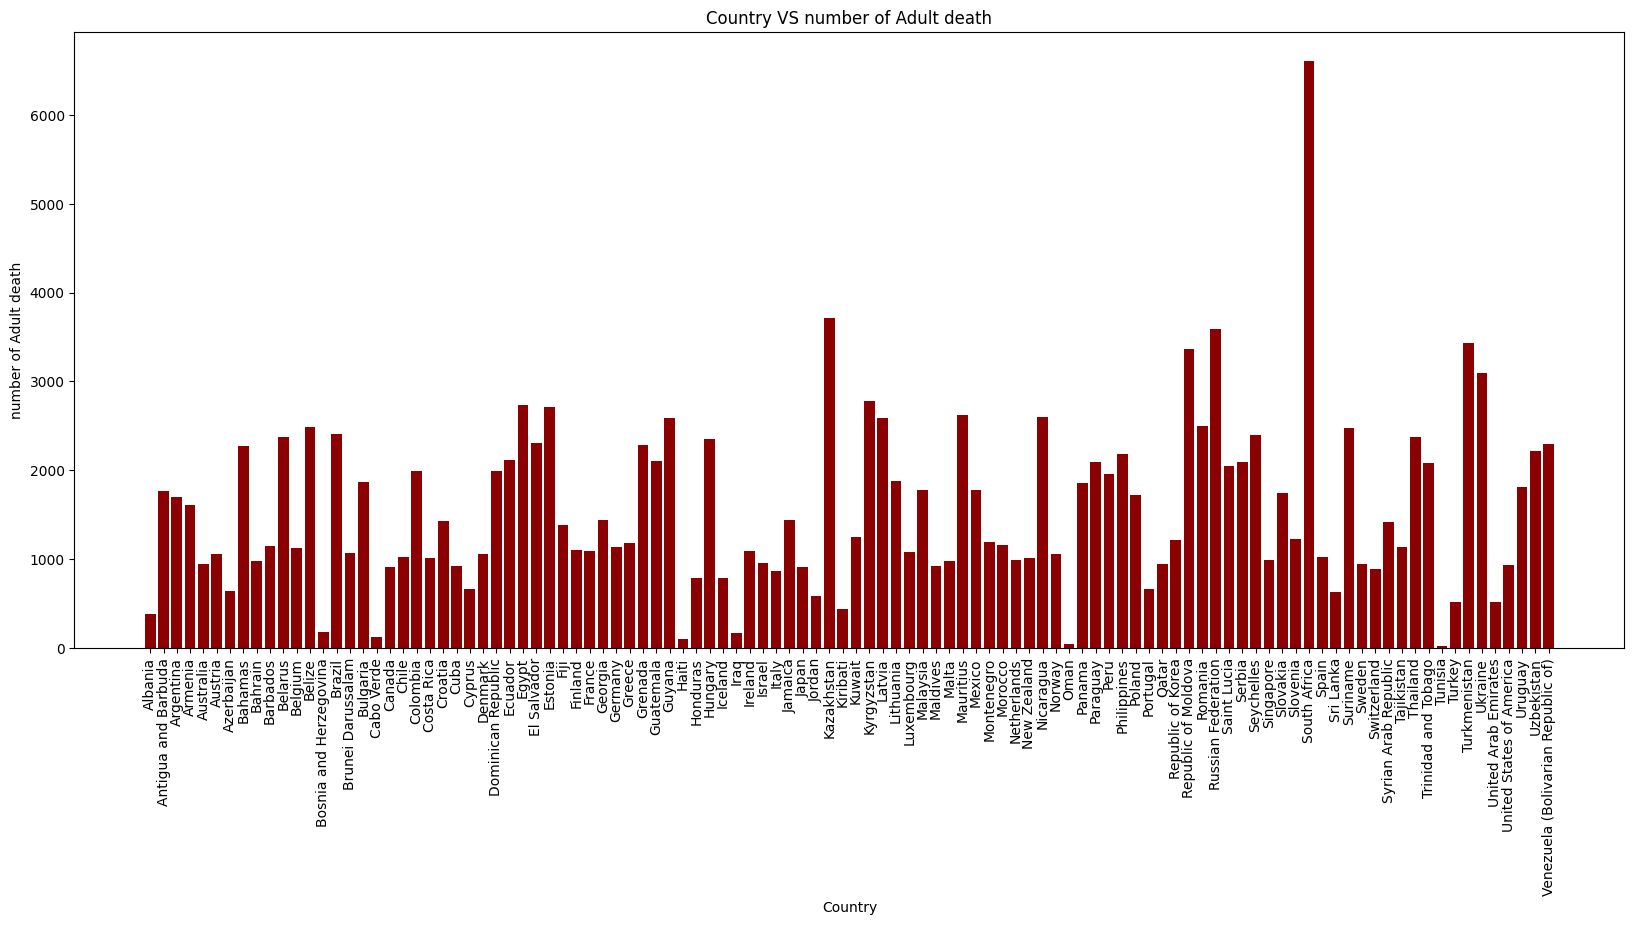

In [32]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithAdultdeaths['Country'],CountrywithAdultdeaths['Adult Death'],color='darkred')
plt.title('Country VS number of Adult death')
plt.xlabel('Country')
plt.ylabel('number of Adult death')
plt.xticks(rotation=90)
plt.show()

**This graph show the number of adult death in years in every country and the biggest number of adult is died is in south africa**

<h2>Country with Infant deaths<h2>

In [33]:
CountrywithInfantdeaths = df.groupby('Country')[['Infant deaths']].sum().reset_index()
CountrywithInfantdeaths

,Country,Infant deaths
0,Albania,11
1,Antigua and Barbuda,0
2,Argentina,162
3,Armenia,14
4,Australia,15
...,...,...
101,United Arab Emirates,6
102,United States of America,419
103,Uruguay,9
104,Uzbekistan,269


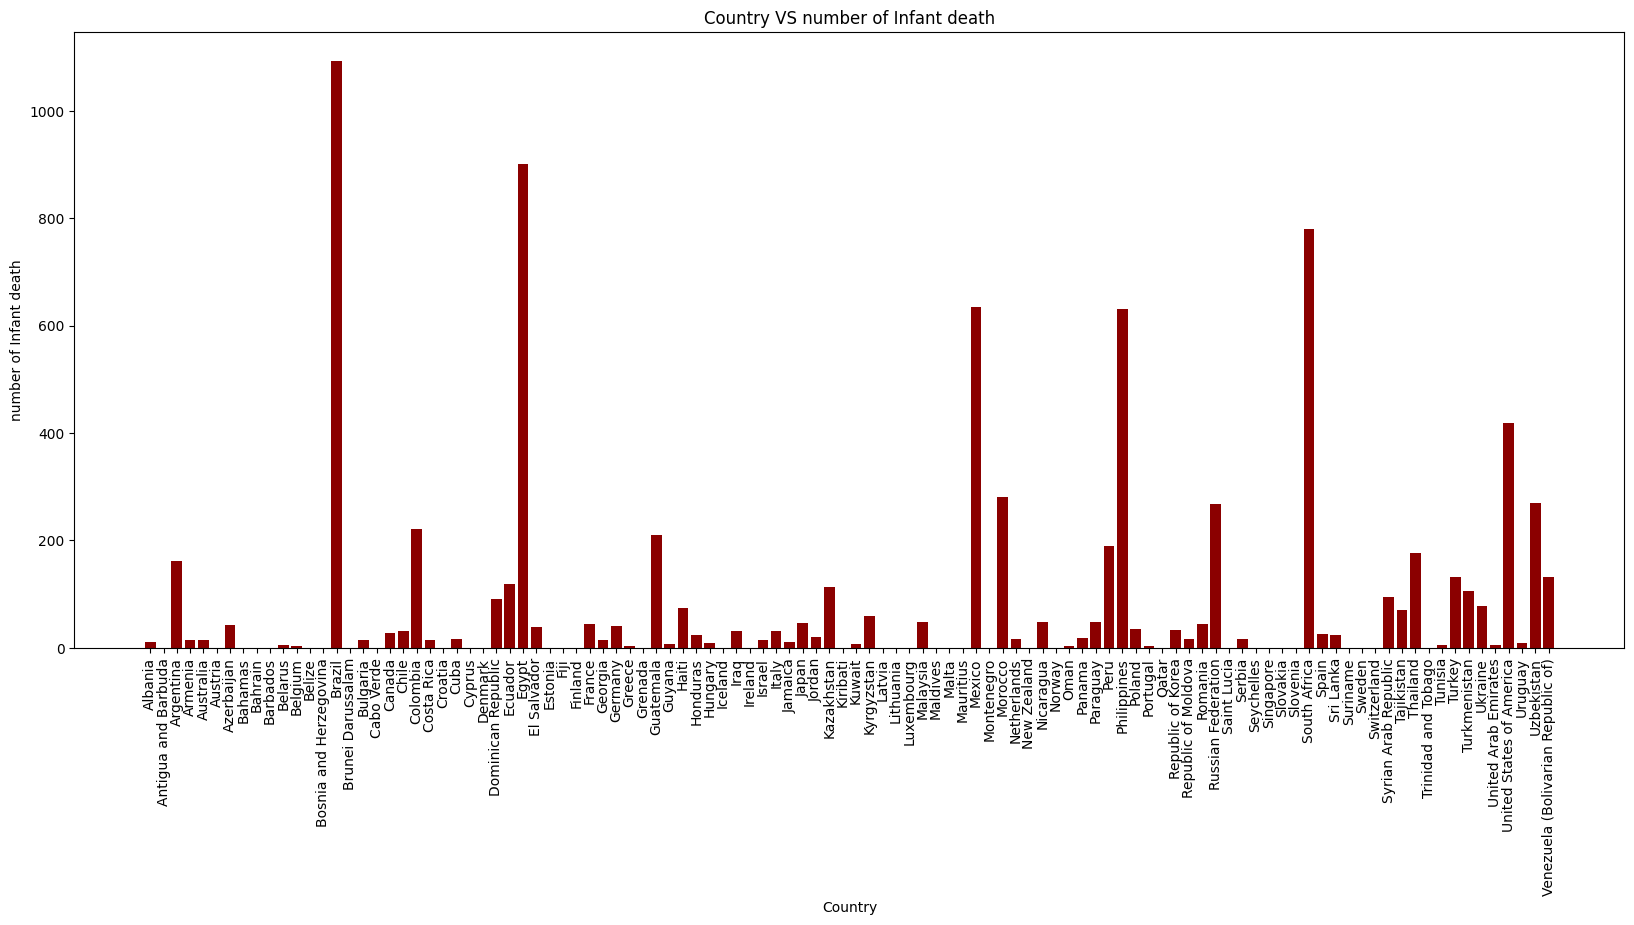

In [34]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithInfantdeaths['Country'],CountrywithInfantdeaths['Infant deaths'],color='darkred')
plt.title('Country VS number of Infant death')
plt.xlabel('Country')
plt.ylabel('number of Infant death')
plt.xticks(rotation=90)
plt.show()

**This graph show the number of Infant death in years in every country and the biggest number of infant is died is in Bosnia and egypt and south africa**

<h2>Country with Under-five deaths<h2>

In [35]:
CountrywithUnderfivedeaths = df.groupby('Country')[['Under-five deaths']].sum().reset_index()
CountrywithUnderfivedeaths

,Country,Under-five deaths
0,Albania,11
1,Antigua and Barbuda,0
2,Argentina,182
3,Armenia,14
4,Australia,20
...,...,...
101,United Arab Emirates,6
102,United States of America,492
103,Uruguay,11
104,Uzbekistan,316


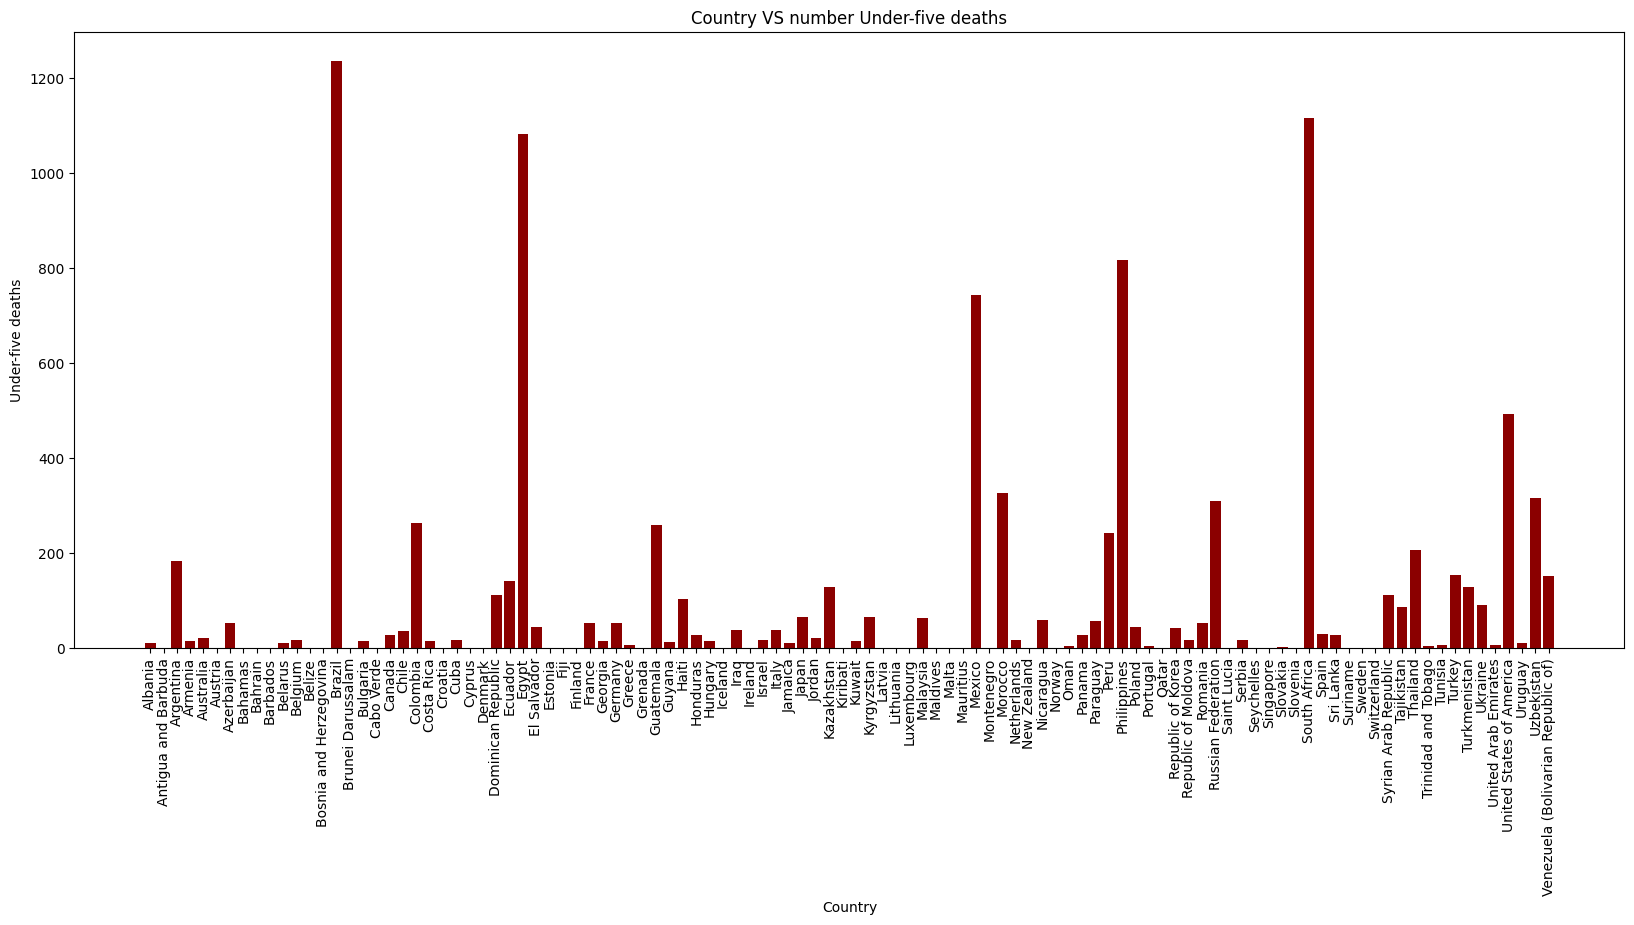

In [36]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithUnderfivedeaths['Country'],CountrywithUnderfivedeaths['Under-five deaths'],color='darkred')
plt.title('Country VS number Under-five deaths')
plt.xlabel('Country')
plt.ylabel('Under-five deaths')
plt.xticks(rotation=90)
plt.show()

**This graph show the number of Under-five deaths in Country**

<h2>Country with Gross Domestic Product<h2>

In [37]:
CountrywithGrossDomesticProduct = df.groupby('Country')['Gross Domestic Product'].sum().reset_index()
CountrywithGrossDomesticProduct

,Country,Gross Domestic Product
0,Albania,12286.119045
1,Antigua and Barbuda,132092.665600
2,Argentina,111977.201650
3,Armenia,29164.060765
4,Australia,550784.325920
...,...,...
101,United Arab Emirates,177165.333480
102,United States of America,56786.373120
103,Uruguay,100914.858192
104,Uzbekistan,7359.853862


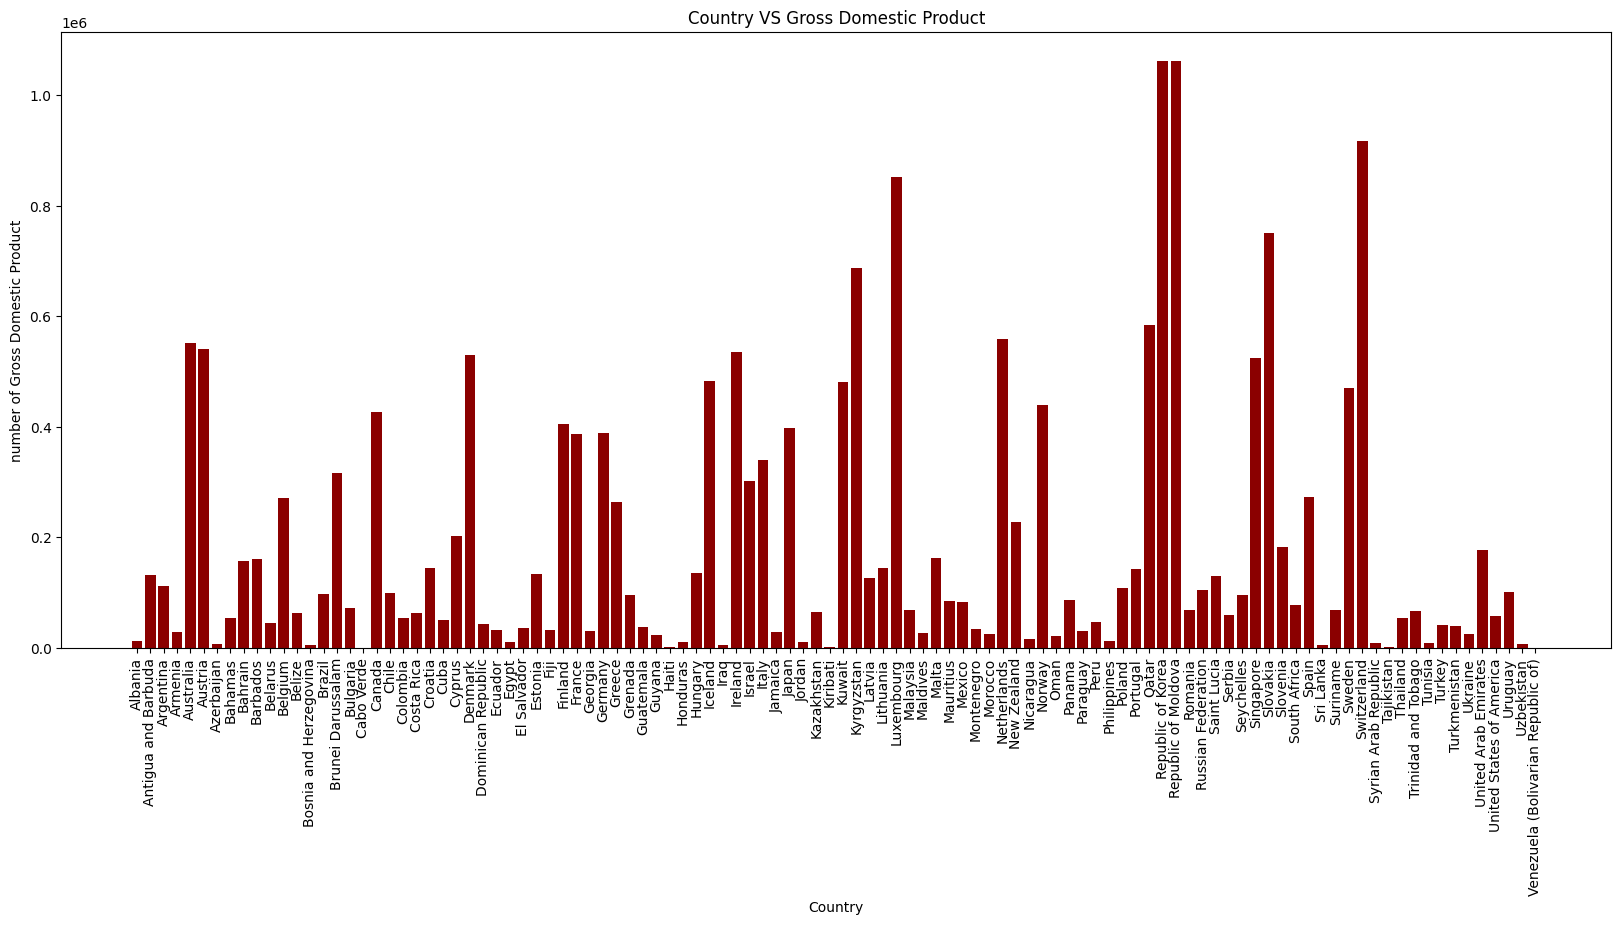

In [38]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithGrossDomesticProduct['Country'],CountrywithGrossDomesticProduct['Gross Domestic Product'],color='darkred')
plt.title('Country VS Gross Domestic Product')
plt.xlabel('Country')
plt.ylabel('number of Gross Domestic Product')
plt.xticks(rotation=90)
plt.show()

**From graph we can see the biggest Gross Domestic Product is in korea and moldova and after this two country we found two country amin few switzerland and luxembourg**

<h2>top 10 Country with Population<h2>

In [39]:
CountrywithPopulation = df.groupby('Country')['Population'].sum().reset_index().sort_values(by = 'Population',ascending=False).head(10)
CountrywithPopulation

,Country,Population
102,United States of America,4.508454e+09
14,Brazil,1.410049e+09
28,Egypt,1.107719e+09
80,Russian Federation,9.561934e+08
77,Republic of Korea,7.480938e+08
35,Germany,6.201176e+08
20,Colombia,5.082789e+08
87,South Africa,4.674214e+08
47,Italy,4.423006e+08
62,Mexico,4.413642e+08


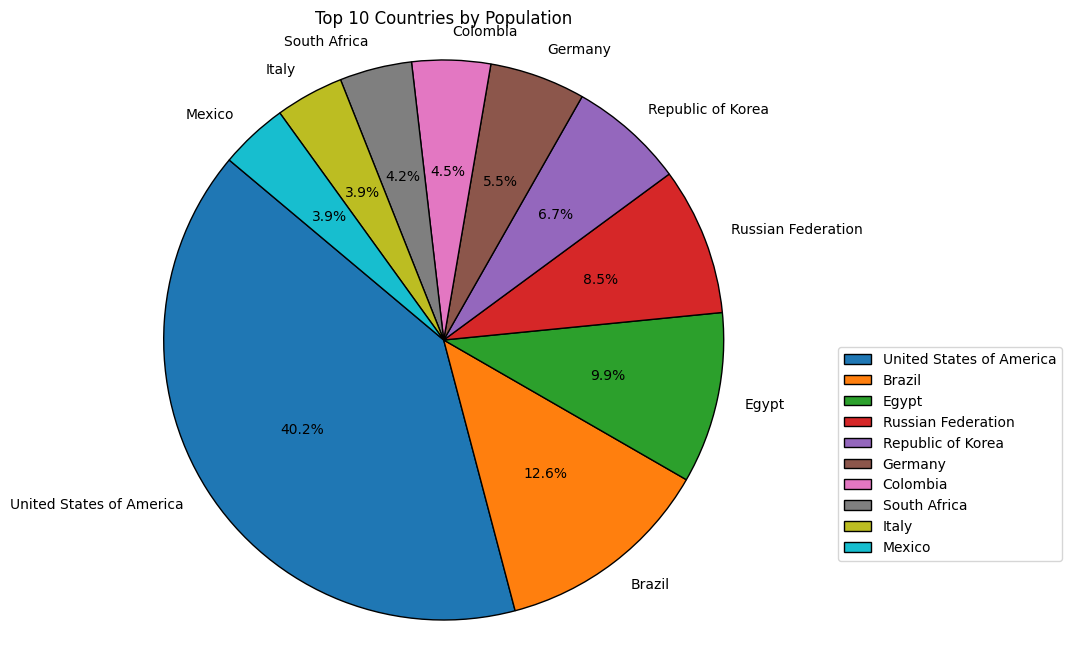

In [40]:
# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(CountrywithPopulation['Population'],
        labels=CountrywithPopulation['Country'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab10.colors,  # Use tab10 color palette
        wedgeprops={'edgecolor': 'black'},  # Add black edge color to slices
        textprops={'fontsize': 10}  # Adjust text size
        )
plt.title('Top 10 Countries by Population')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show()

<h2>Country with Alochol<h2>

In [41]:
CountrywithAlochol = df.groupby('Country')['Alcohol'].sum().reset_index()
CountrywithAlochol

,Country,Alcohol
0,Albania,53.20
1,Antigua and Barbuda,112.12
2,Argentina,127.43
3,Armenia,51.39
4,Australia,151.74
...,...,...
101,United Arab Emirates,10.50
102,United States of America,137.51
103,Uruguay,92.65
104,Uzbekistan,17.66


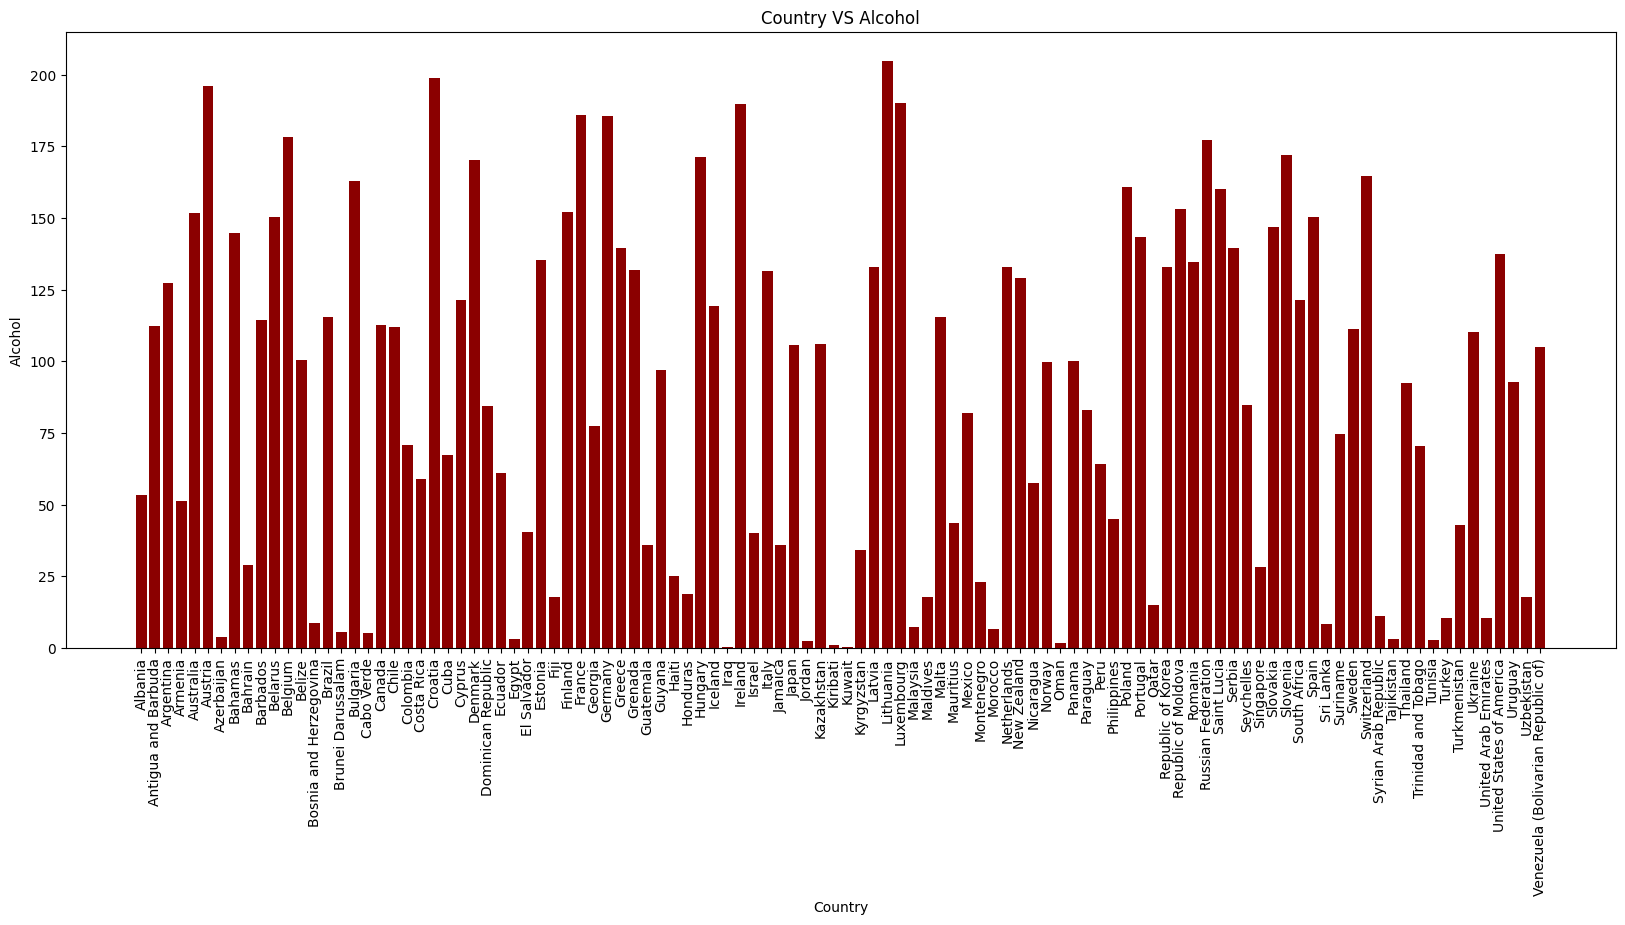

In [42]:
plt.figure(figsize=(20,8))
plt.bar(CountrywithAlochol['Country'],CountrywithAlochol['Alcohol'],color='darkred')
plt.title('Country VS Alcohol')
plt.xlabel('Country')
plt.ylabel('Alcohol')
plt.xticks(CountrywithAlochol['Country'],rotation=90)
plt.show()

**From this graph we can see the biggest percentage of Alcohol in country**

**this pie show the top 10 country have Population**

In [43]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


<h2>Year with Suicides number<h2>

In [44]:
YearwithSuicidesnumber = df.groupby('Year')['Suicides number'].sum().reset_index()
YearwithSuicidesnumber

,Year,Suicides number
0,2000,252510.0
1,2001,247669.0
2,2002,253100.0
3,2003,253002.0
4,2004,237551.0
5,2005,231220.0
6,2006,229989.0
7,2007,230371.0
8,2008,232160.0
9,2009,239829.0


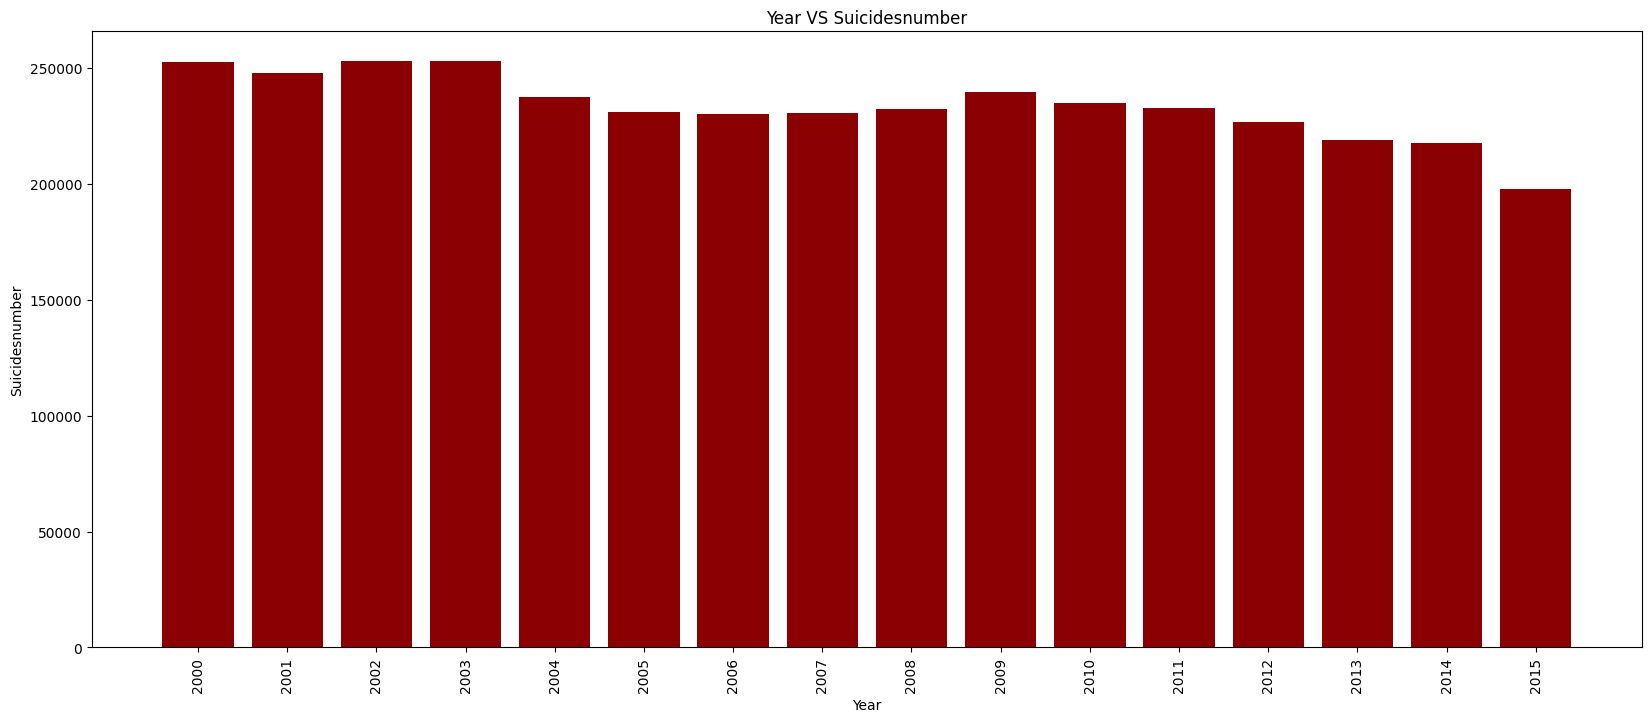

In [45]:
plt.figure(figsize=(20,8))
plt.bar(YearwithSuicidesnumber['Year'],YearwithSuicidesnumber['Suicides number'],color='darkred')
plt.title('Year VS Suicidesnumber')
plt.xlabel('Year')
plt.ylabel('Suicidesnumber')
plt.xticks(YearwithSuicidesnumber['Year'],rotation=90)
plt.show()

**this bar show the number of Suicides number in every year**

<h2>Year with Adult death<h2>

In [46]:
YearwithAdultdeath = df.groupby('Year')['Adult Death'].sum().reset_index()
YearwithAdultdeath

,Year,Adult Death
0,2000,12014.0
1,2001,12017.0
2,2002,11871.0
3,2003,11466.0
4,2004,11319.0
5,2005,11265.0
6,2006,11041.0
7,2007,10575.0
8,2008,11439.0
9,2009,10819.0


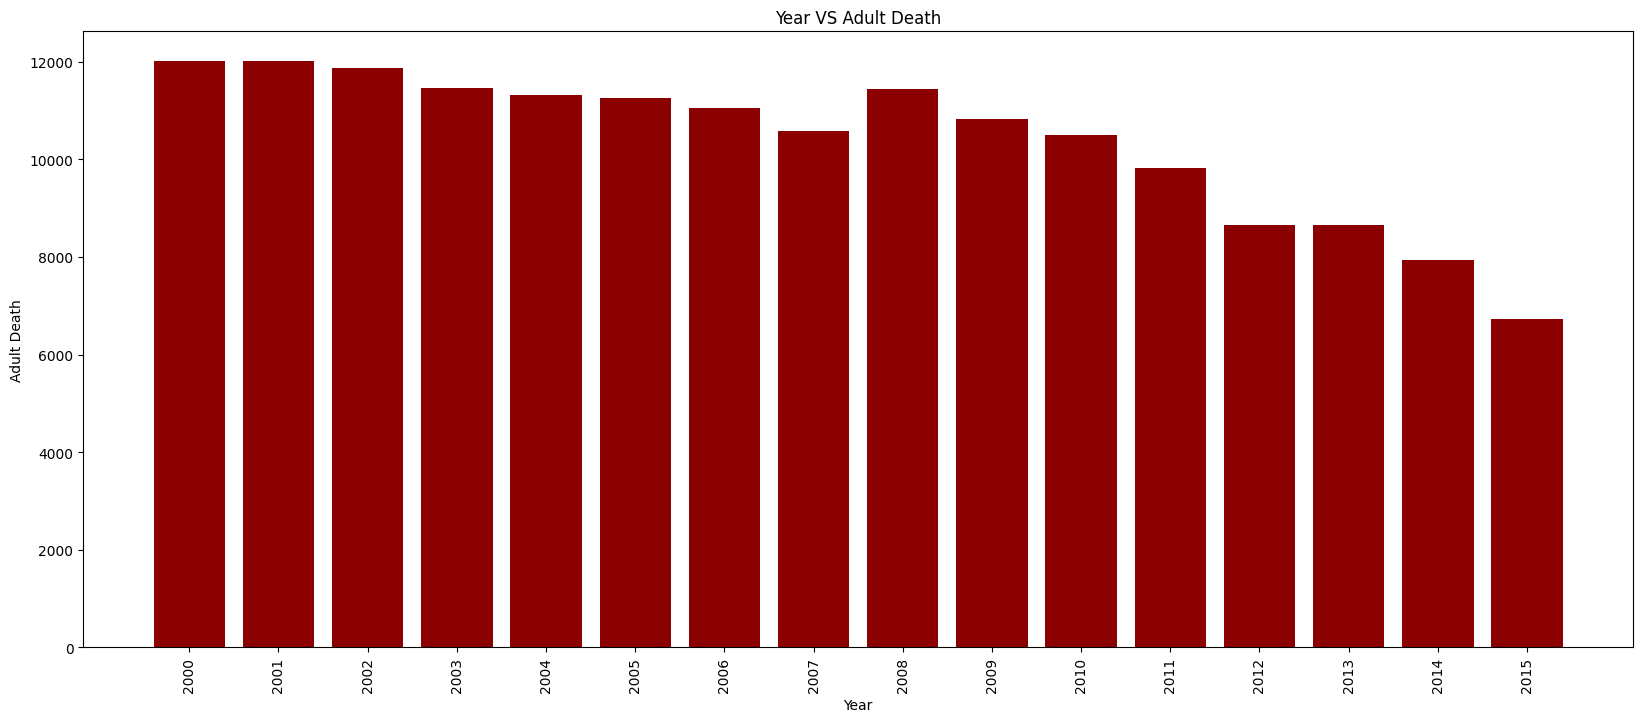

In [47]:
plt.figure(figsize=(20,8))
plt.bar(YearwithAdultdeath['Year'],YearwithAdultdeath['Adult Death'],color='darkred')
plt.title('Year VS Adult Death')
plt.xlabel('Year')
plt.ylabel('Adult Death')
plt.xticks(YearwithAdultdeath['Year'],rotation=90)
plt.show()

**this bar show the number of Adult Death every year**

<h2>Year with infan death<h2>

In [48]:
Yearwithinfantdeath = df.groupby('Year')['Infant deaths'].sum().reset_index()
Yearwithinfantdeath

,Year,Infant deaths
0,2000,699
1,2001,675
2,2002,667
3,2003,641
4,2004,548
5,2005,481
6,2006,505
7,2007,507
8,2008,528
9,2009,524


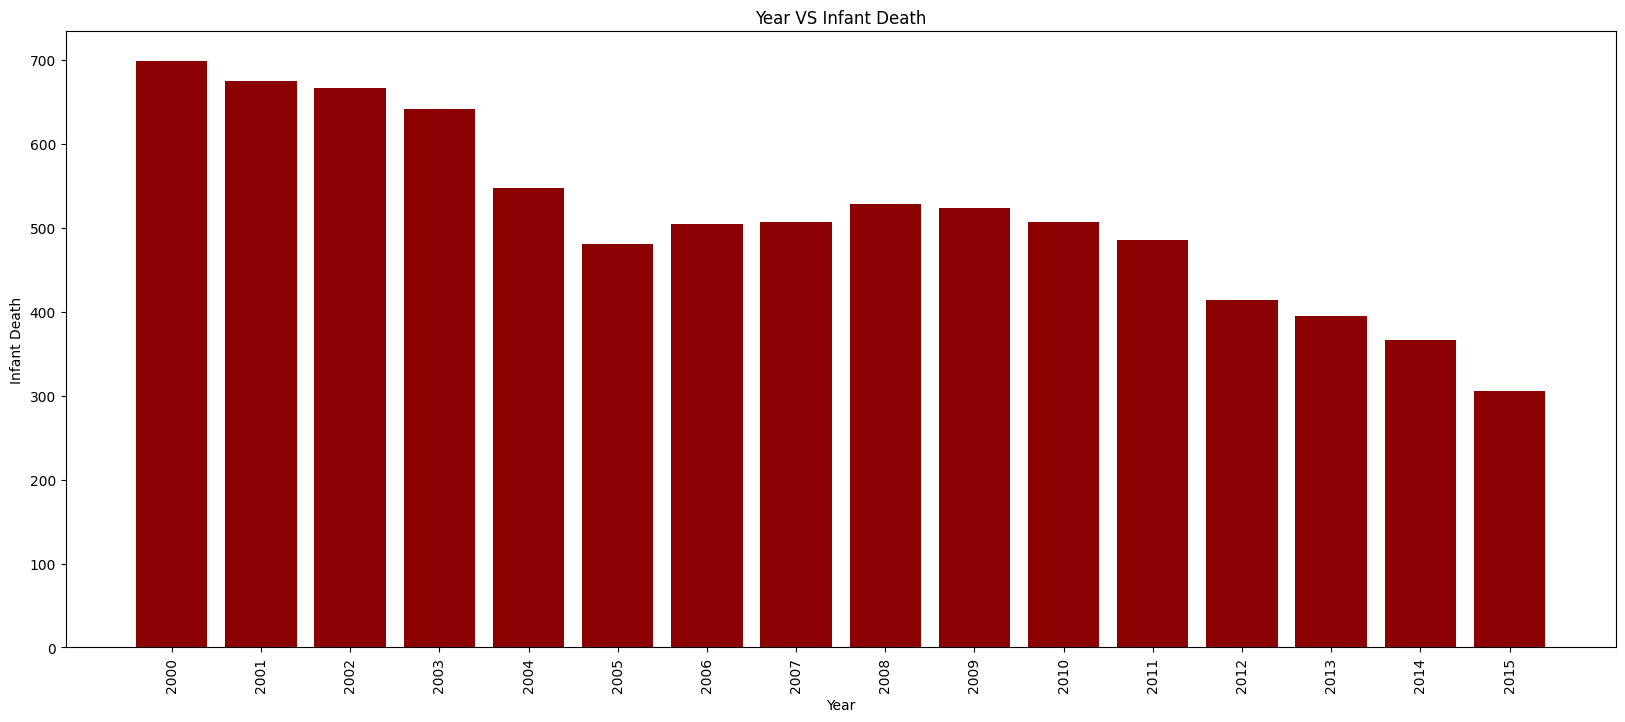

In [49]:
plt.figure(figsize=(20,8))
plt.bar(Yearwithinfantdeath['Year'],Yearwithinfantdeath['Infant deaths'],color='darkred')
plt.title('Year VS Infant Death')
plt.xlabel('Year')
plt.ylabel('Infant Death')
plt.xticks(Yearwithinfantdeath['Year'],rotation=90)
plt.show()

**this bar show the number of Infant Death every year**

In [50]:
YearwithUnderfivedeaths = df.groupby('Year')['Under-five deaths'].sum().reset_index()
YearwithUnderfivedeaths

,Year,Under-five deaths
0,2000,860
1,2001,833
2,2002,820
3,2003,788
4,2004,665
5,2005,586
6,2006,620
7,2007,624
8,2008,640
9,2009,638


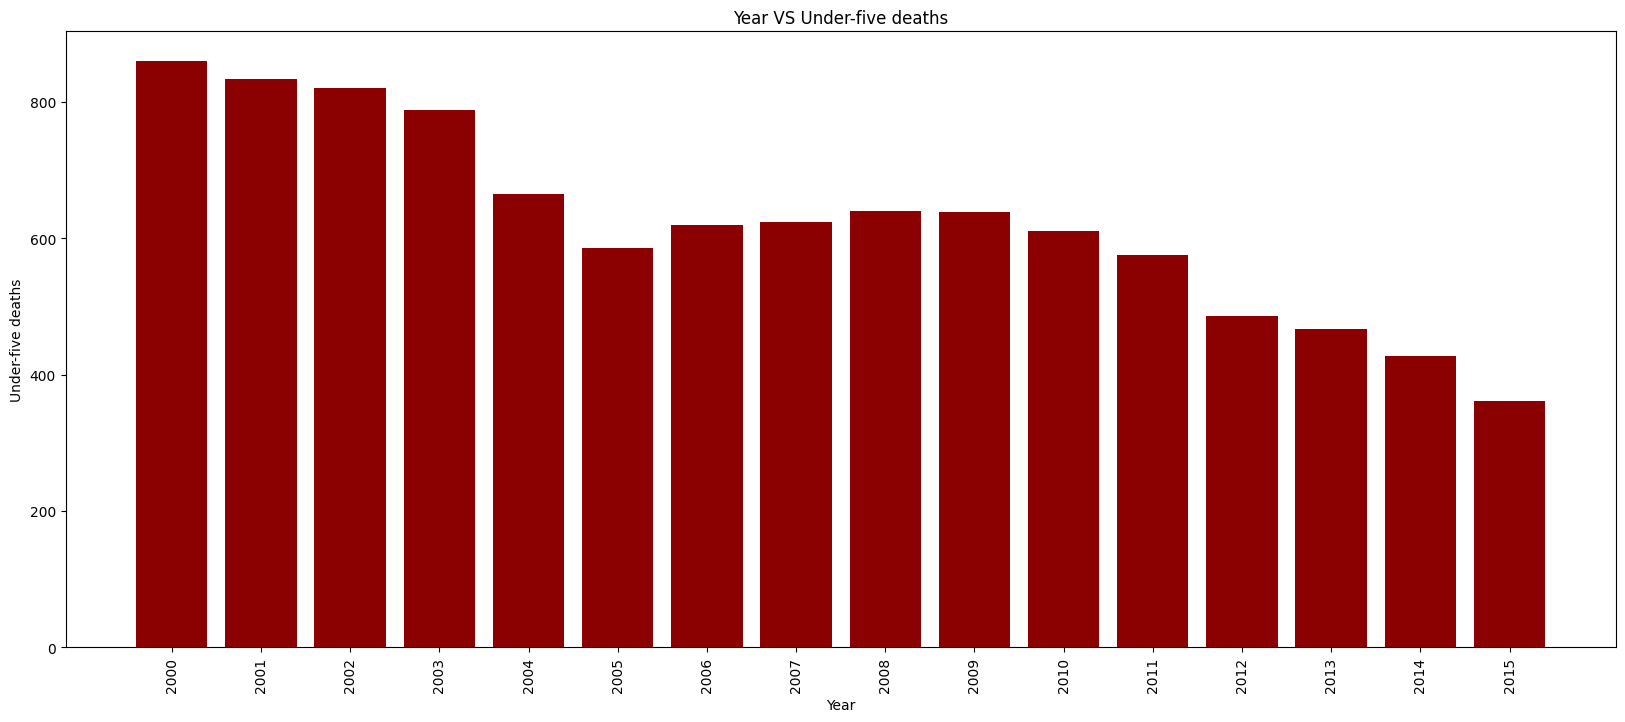

In [51]:
plt.figure(figsize=(20,8))
plt.bar(YearwithUnderfivedeaths['Year'],YearwithUnderfivedeaths['Under-five deaths'],color='darkred')
plt.title('Year VS Under-five deaths')
plt.xlabel('Year')
plt.ylabel('Under-five deaths')
plt.xticks(YearwithUnderfivedeaths['Year'],rotation=90)
plt.show()

**The number of Under-five deaths in every year**

<h2>Year with Gross Domestic Product<h2>

In [52]:
YearwithGrossDomesticProduct = df.groupby('Year')['Gross Domestic Product'].sum().reset_index()
YearwithGrossDomesticProduct

,Year,Gross Domestic Product
0,2000,8.636090e+05
1,2001,9.212463e+05
2,2002,8.466697e+05
3,2003,8.757005e+05
4,2004,1.233919e+06
5,2005,1.242558e+06
6,2006,1.258050e+06
7,2007,1.464225e+06
8,2008,1.789341e+06
9,2009,1.278440e+06


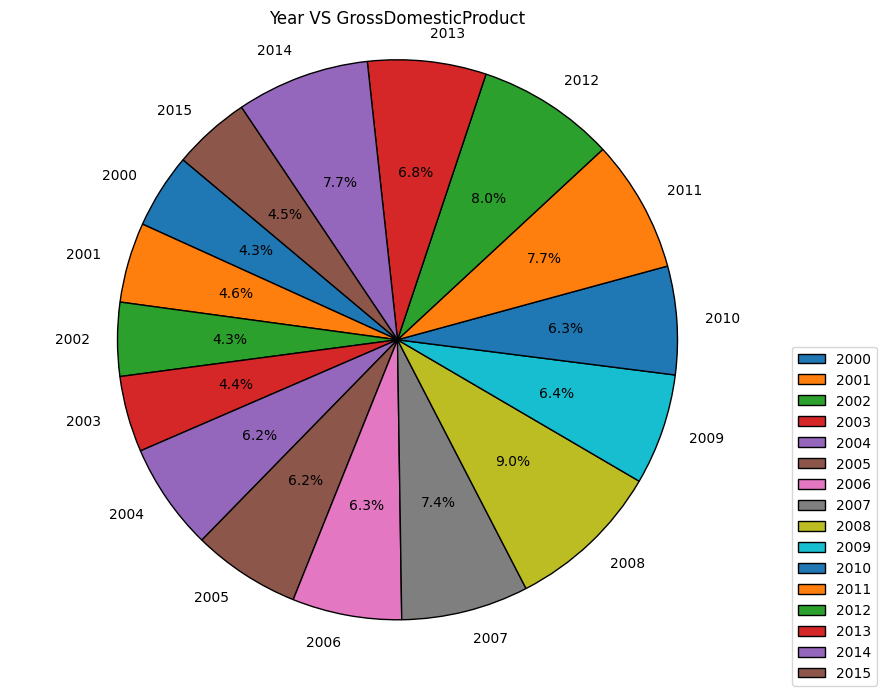

In [53]:
# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(YearwithGrossDomesticProduct['Gross Domestic Product'],
        labels=YearwithGrossDomesticProduct['Year'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab10.colors,  # Use tab10 color palette
        wedgeprops={'edgecolor': 'black'},  # Add black edge color to slices
        textprops={'fontsize': 10}  # Adjust text size
        )
plt.title('Year VS GrossDomesticProduct')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show()

**This pie show the Year with GrossDomesticProduct every year**

<h2>Year with Population<h2>

In [54]:
YearwithPopulation = df.groupby('Year')['Population'].sum().reset_index()
YearwithPopulation

,Year,Population
0,2000,1.205798e+09
1,2001,9.815272e+08
2,2002,8.861081e+08
3,2003,1.350420e+09
4,2004,1.058102e+09
5,2005,1.371747e+09
6,2006,1.069997e+09
7,2007,1.109043e+09
8,2008,9.541530e+08
9,2009,1.313863e+09


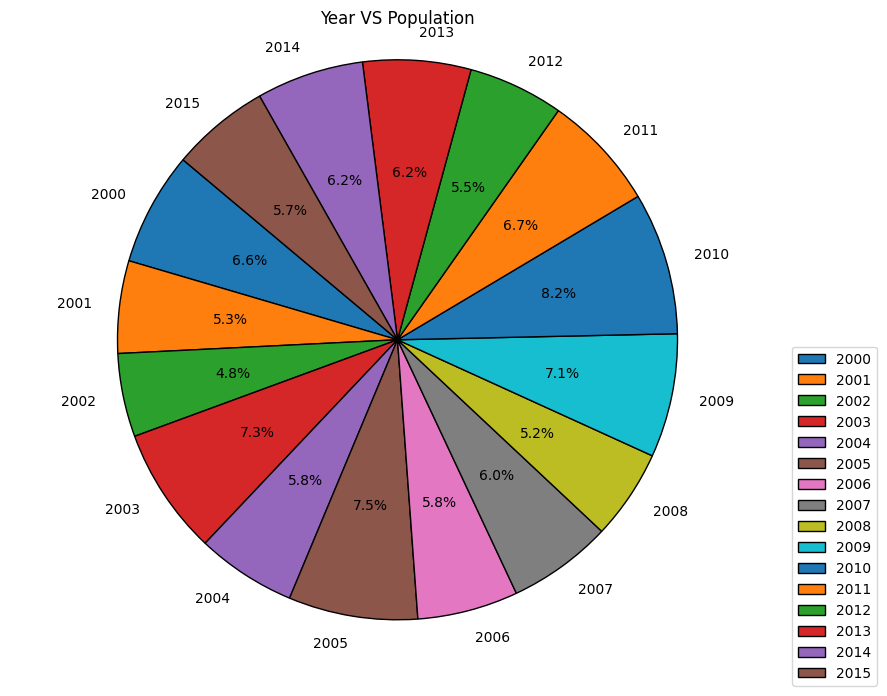

In [55]:
# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(YearwithPopulation['Population'],
        labels=YearwithPopulation['Year'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab10.colors,  # Use tab10 color palette
        wedgeprops={'edgecolor': 'black'},  # Add black edge color to slices
        textprops={'fontsize': 10}  # Adjust text size
        )
plt.title('Year VS Population')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show()

**The number of Population every year in country**

In [56]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


<h2>Suicidesnumber with Population<h2>

In [57]:
total_Population = df['Population'].sum()
total_Population

18388538043.440002

In [58]:
total_suicides = df['Suicides number'].sum()
total_suicides

3736061.0

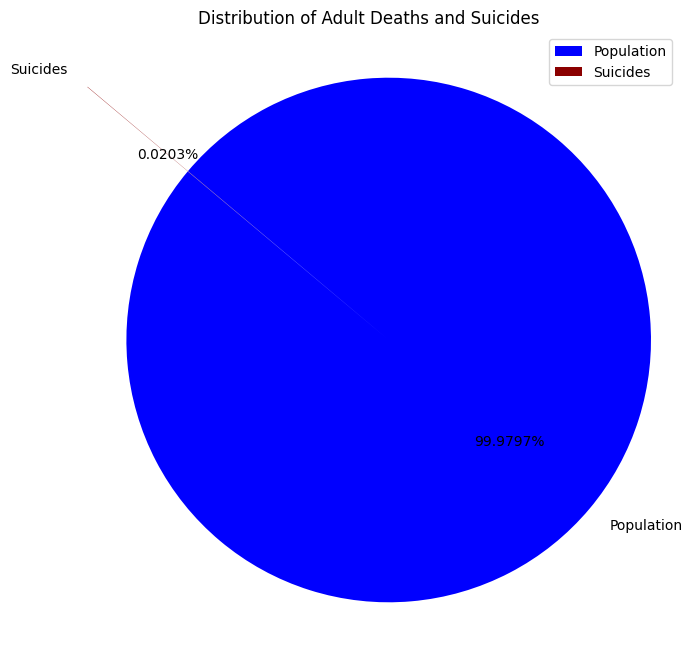

In [59]:
# Data for the pie chart
labels = ['Population', 'Suicides']
sizes = [total_Population, total_suicides]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=140, colors=['b','darkred'],explode=[0.5,0])
plt.title('Distribution of Adult Deaths and Suicides')
plt.axis('equal')
plt.legend()# Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<h2>Suicides number with Adult Death<h2>

In [60]:
total_adult_deaths = df['Adult Death'].sum()
total_adult_deaths

166133.0

In [61]:
total_suicides = df['Suicides number'].sum()
total_suicides

3736061.0

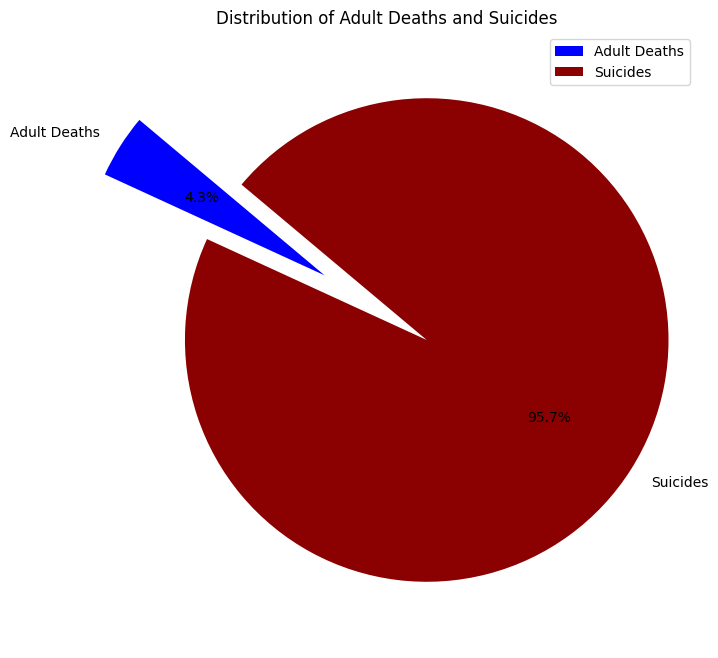

In [62]:
# Data for the pie chart
labels = ['Adult Deaths', 'Suicides']
sizes = [total_adult_deaths, total_suicides]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['b','darkred'],explode=[0.5,0])
plt.title('Distribution of Adult Deaths and Suicides')
plt.axis('equal')
plt.legend()# Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<h2>Suicides number with infant Death<h2>

In [63]:
total_ifant_deaths = df['Infant deaths'].sum()
total_ifant_deaths

8249

In [64]:
total_suicides = df['Suicides number'].sum()
total_suicides

3736061.0

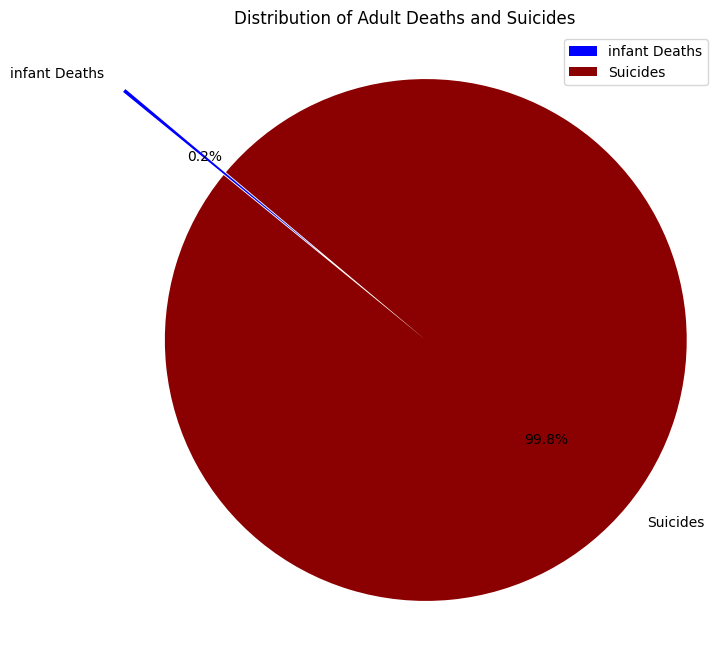

In [65]:
# Data for the pie chart
labels = ['infant Deaths', 'Suicides']
sizes = [total_ifant_deaths, total_suicides]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['b','darkred'],explode=[0.5,0])
plt.title('Distribution of Adult Deaths and Suicides')
plt.axis('equal')
plt.legend()# Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<h2>Suicides number with Under five Death<h2>

In [66]:
total_underfive_deaths = df['Under-five deaths'].sum()
total_underfive_deaths

10002

In [67]:
total_suicides = df['Suicides number'].sum()
total_suicides

3736061.0

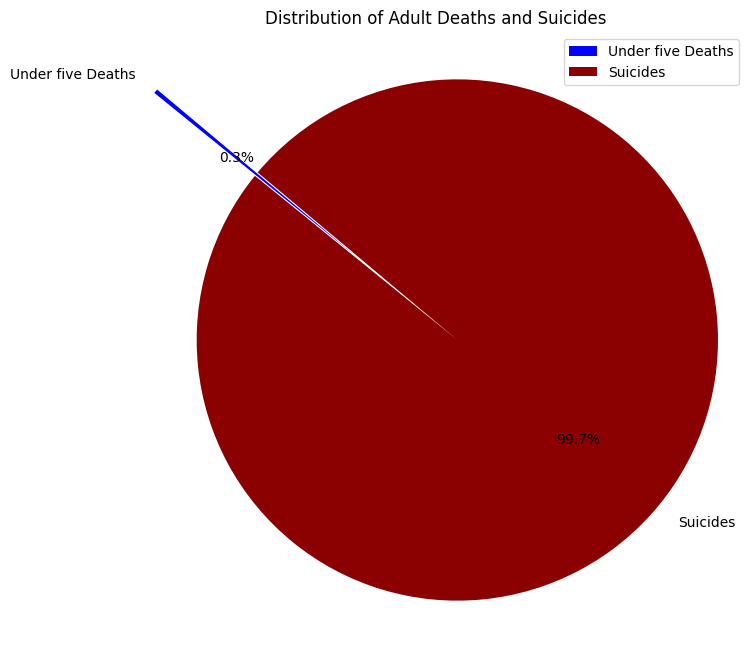

In [68]:
# Data for the pie chart
labels = ['Under five Deaths', 'Suicides']
sizes = [total_underfive_deaths, total_suicides]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['b','darkred'],explode=[0.5,0])
plt.title('Distribution of Adult Deaths and Suicides')
plt.axis('equal')
plt.legend()# Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [69]:
df.head()

,Country,Year,Suicides number,Average age,Adult Death,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


<h2>distribution of 'Suicides number',
                    'Adult Death', 
                    'Infant deaths', 
                    'Average age', 
                    'Gross Domestic Product','HIV/AIDS',
                    'Schooling',
                    'Income composition of resources'<h2>

In [70]:
histogram_labels = ['Suicides number',
                    'Adult Death', 
                    'Infant deaths', 
                    'Average age', 
                    'Gross Domestic Product',
                    'HIV/AIDS',
                    'Schooling',
                    'Income composition of resources'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)